# Discrimination and detection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
#import pymc as pm
#import arviz as az
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
from itertools import repeat
from sklearn.metrics import roc_curve
import imageio
import warnings
import random
warnings.filterwarnings("ignore")

## Problem 7.2

Suppose the prior distribution and the posterior distribution are as in Fig. 7.2.
a) Calculate the likelihood ratio.
b) Does the sensory evidence alone (without the prior) indicate that the stimulus was s+ or s−?
c) Do the prior and the likelihood favor the same alternative?

In [26]:
posterior_S_neg = 0.55
posterior_S_pos = 0.45

prior_S_neg = 0.7
prior_S_pos = 0.3

d =  np.log(posterior_S_pos/posterior_S_neg)
prior_ratio = np.log(prior_S_pos/prior_S_neg)
likelihood_ratio = d/prior_ratio
likelihood_ratio

0.23683607010461172

In [28]:
d

-0.20067069546215124

In [30]:
prior_ratio

-0.8472978603872036

As we can see here, d or log posterior ratio is not positive, which means that the s- is favorable. but without considering the prior, log likelihood ratio is positive which favors the s positive. In that sense, the answer is no. without considering prior or with sensory evidence alone we cant indicate the true stimulus.

## Problem 7.3

In this problem, we explore the relationship between posterior probabilities and log
posterior ratio numerically.

### Part a

a) Create a vector of 99 possible posterior probabilities of s+, from 0.01 to 0.99 in steps of 0.01.
For each value, calculate the log posterior ratio d = log p(s=s+|x)
p(s=s−|x). Then plot this ratio as a
function of the posterior probability of s+. This should show that every posterior probability
corresponds to exactly one log posterior ratio and the other way round (we are dealing with
monotonic functions). Knowing one is as good as knowing the other.

In [85]:
pos_probability = np.arange(0.01,1, 0.01)

In [87]:
pos_probability

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [73]:
d = np.log(pos_probability/(1 - pos_probability))
len(d)

99

Text(0, 0.5, 'Log posterior ratio')

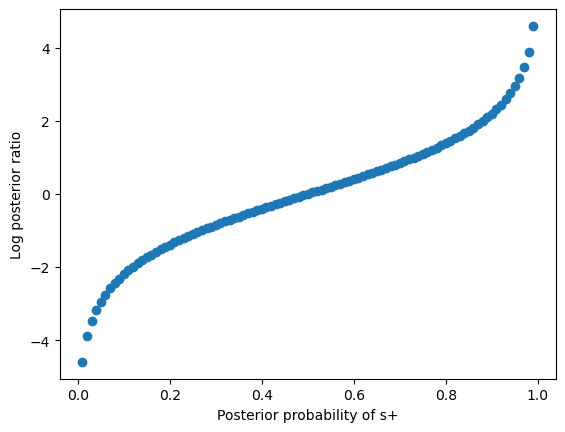

In [83]:
plt.scatter(pos_probability, d)
plt.xlabel('Posterior probability of s+')
plt.ylabel('Log posterior ratio')

### Part b

b) Why did we not include the posterior probabilities 0 and 1?

The denominator of the fraction cannot be zero.

### Part c

c) Suppose you know the log posterior ratio d. Express the posterior probability of s = s+,
p(s = s+|x), as a function of d only. Do the same for p(s = s−|x).

page 148

### Part d

d) If the log posterior ratio is 0.1, what are the posterior probabilities of s+ and s−? What if the
log posterior ratio is 1?

In [103]:
d = 0.1

In [105]:
p_s_positive = 1/(1+np.exp(-d))
p_s_negative = 1/(1+np.exp(d))
posteriors = [p_s_positive, p_s_negative]
posteriors

[0.52497918747894, 0.47502081252106]

In [107]:
d = 1

In [109]:
p_s_positive = 1/(1+np.exp(-d))
p_s_negative = 1/(1+np.exp(d))
posteriors = [p_s_positive, p_s_negative]
posteriors

[0.7310585786300049, 0.2689414213699951]

## Problem 7.4 

We formulated the decision rule as reporting one alternative d > 0 and the other whend < 0. Why does the case d(x) = 0 usually not have to be considered? What would the observer dowhen d(x) = 0?

In [113]:
# lets see what happens first
d = 0

In [115]:
p_s_positive = 1/(1+np.exp(-d))
p_s_negative = 1/(1+np.exp(d))
posteriors = [p_s_positive, p_s_negative]
posteriors

[0.5, 0.5]

In this case the posteriors must be equal. Although this might not happen frequently, having the same probabilities for two options yeilds a random like decision (at least for me!).

## Problem 7.6 

Suppose the stimulus s can take two values: s+ = 1◦ and s− = −1◦. Suppose that the
measurement is normally distributed around s with standard deviation 0.5◦. On a given trial, the
observer’s measurement is −0.1◦, and s = s+ occurs on 80% of trials. Would an optimal observer
report that the stimulus was s+ or s−? Provide all the steps in your reasoning.

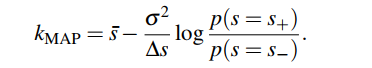

(array([ 4.,  4.,  3., 17., 25., 14., 16.,  7.,  6.,  4.]),
 array([-2.23651843, -2.00777881, -1.77903919, -1.55029957, -1.32155994,
        -1.09282032, -0.8640807 , -0.63534108, -0.40660146, -0.17786184,
         0.05087779]),
 <BarContainer object of 10 artists>)

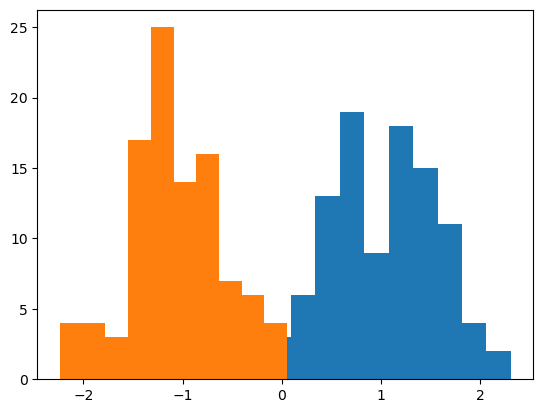

In [144]:
sigma = 0.5
S_pos_dis = np.random.normal(1, sigma, 100)
S_neg_dis = np.random.normal(-1, sigma, 100)


plt.hist(S_pos)
plt.hist(S_neg)

In [140]:
prior_ratio = np.log(80/20)
delta_s = 2 #s_pos - s_neg
s = 0
x = -0.1
var = 0.5**2
k_map = s - (var/delta_s) * prior_ratio

if k_map>x:
    print("simulus is s positive")
else:
    print("Simulus is negative")

Simulus is negative


In [142]:
k_map

-0.17328679513998632

## Problem 7.7

We want to choose our criterion k for a decision-making task such that the probability of being correct is maximized. Starting from Eq. (7.20), derive an expression for the criterion k.

the optimal criterion for kmap is the midline between S+ and S-.

$k = \frac{S+ + S-}{2}$

## Problem 7.10

This problem was designed by Ronald van den Berg when he was a postdoc with
W.J.M. In the first row of the figure below, each plot shows the distributions of the log posterior
ratio under each of the two alternatives in a binary decision task. The second row displays receiveroperating characteristic (ROC) curves. Indicate for each ROC to which plot in the top row it
belongs.

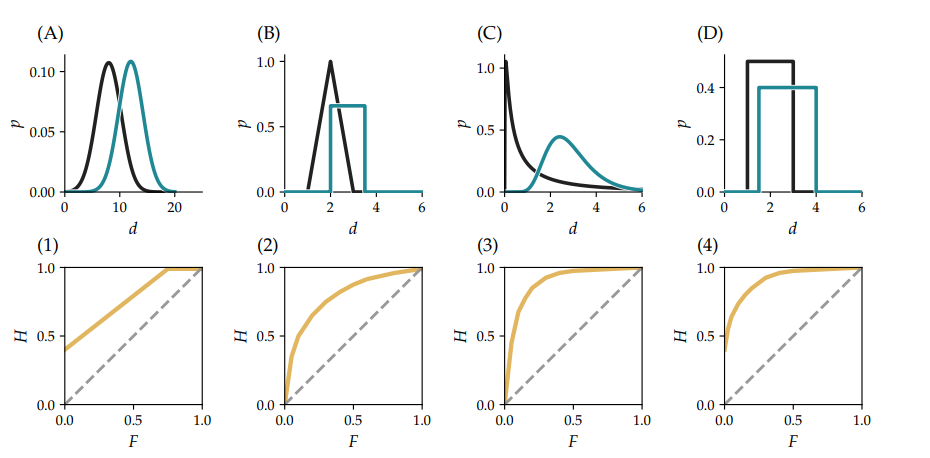

In [86]:
from scipy import signal

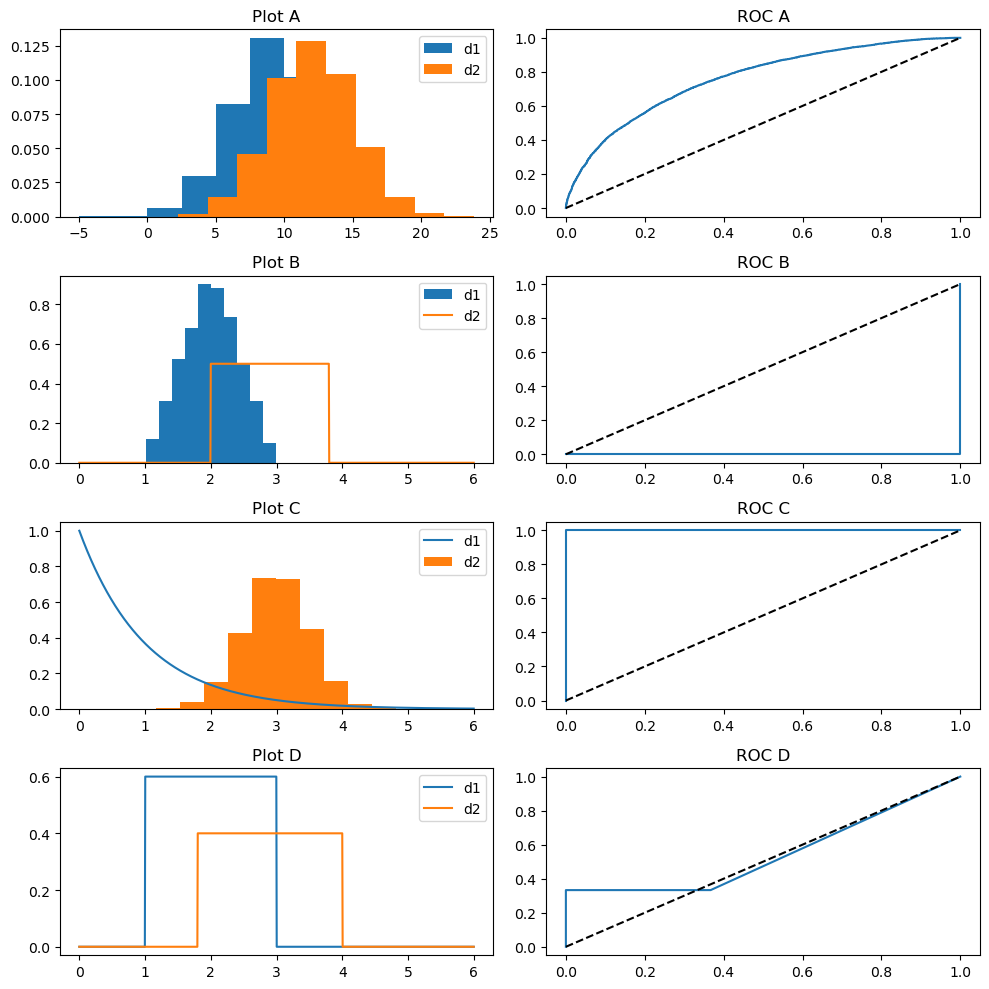

In [184]:
from scipy.stats import norm, expon

d_a1 = np.random.normal(9, 3, 10000)
d_a2 = np.random.normal(12, 3, 10000)

x2 = np.linspace(0, 6, 1000)
# Plot B: One triangular distribution and one sharply peaked distribution
d_b1 = np.random.triangular(1, 2,3, 10000)
d_b2 = np.where((x2 >= 2) & (x2 <= 3.8), 0.5, 0.0)

# Plot C: One exponential distribution and one skewed Gaussian distribution
d_c1 = expon.pdf(x2, scale=1)
d_c2 = np.random.normal(3, 0.5, 10000)

# Plot D: Two non-overlapping uniform distributions
d_d1 = np.where((x2 >= 1) & (x2 <= 3), 0.6, 0.0)
d_d2 = np.where((x2 >= 1.8) & (x2 <= 4), 0.4, 0.0)


def calc_roc(d1, d2):
    labels = np.concatenate([np.ones(len(d1)), np.zeros(len(d2))])
    scores = np.concatenate([d1, d2])
    fpr, tpr, _ = roc_curve(labels, scores)
    return fpr, tpr

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Plot A
axs[0, 0].hist(d_a1, label='d1',  density=True)
axs[0, 0].hist(d_a2, label='d2',  density=True)
axs[0, 0].set_title('Plot A')
axs[0, 0].legend()

fpr_a, tpr_a = calc_roc(d_a1, d_a2)
axs[0, 1].plot(tpr_a, fpr_a)
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_title('ROC A')

# Plot B
axs[1, 0].hist(d_b1, label='d1', density=True)
axs[1, 0].plot(x2, d_b2, label='d2')
axs[1, 0].set_title('Plot B')
axs[1, 0].legend()

fpr_b, tpr_b = calc_roc(d_b1, d_b2)
axs[1, 1].plot(tpr_b, fpr_b)
axs[1, 1].plot([0, 1], [0, 1], 'k--')
axs[1, 1].set_title('ROC B')

# Plot C
axs[2, 0].plot(x2, d_c1, label='d1')
axs[2, 0].hist(d_c2, label='d2', density =True)
axs[2, 0].set_title('Plot C')
axs[2, 0].legend()

fpr_c, tpr_c = calc_roc(d_c1, d_c2)
axs[2, 1].plot(tpr_c, fpr_c)
axs[2, 1].plot([0, 1], [0, 1], 'k--')
axs[2, 1].set_title('ROC C')

# Plot D
axs[3, 0].plot(x2, d_d1, label='d1')
axs[3, 0].plot(x2, d_d2, label='d2')
axs[3, 0].set_title('Plot D')
axs[3, 0].legend()

fpr_d, tpr_d = calc_roc(d_d1, d_d2)
axs[3, 1].plot(fpr_d, tpr_d)
axs[3, 1].plot([0, 1], [0, 1], 'k--')
axs[3, 1].set_title('ROC D')

plt.tight_layout()
plt.show()


My answer is probably wrong...
But i just try

## Problem 7.11

We will simulate the ROC in a detection problem. An observer is trying to detect
a signal of strength s+ = 3 in noise (s− = 0). The noise has a normal distribution with standard
deviation σ = 2. On each trial, an experimenter presents noise (probability 0.4), or noise plus signal
(probability 0.6). The task of the observer is to respond whether the signal is present or absent.

a) Simulate the stimulus (signal or noise) on each of the 100,000 trials. Save as a column vector.

b) Simulate the measurement on each trial.

c) Based on the measurements in part (b), calculate two measurement histograms: one for the
trials when the signal was present and one for the trials when the signal was absent. Use as
basis for your histograms a set of 50 bins, linearly spaced between -10 and 10. Normalize
both histograms. Plot both in the same plot as lines (not as bars).

d) Based on the measurements in part (b), calculate the log posterior ratio on each trial. Calculate and plot the histograms of the log posterior ratio analogous to the histograms of the
measurement in part (c).

e) Assume now that on each trial, the observer also provides a confidence rating by reporting
“high confidence” when the absolute value of the log posterior ratio exceeds 2, “medium
confidence” when it lies between 1 and 2, and “low confidence” when it is lies between 0
and 1. Create a 2-by-6 table of the two possible stimuli (signal present or absent) and the six
possible responses. In each cell, put the frequency of the response (normalized by row).

f) Calculate the empirical ROC by cumulatively summing the response frequencies.

g) Plot the resulting points on top of the theoretical ROC based on Eqs. (7.38).

h) Simulate and describe what happens to the ROC when you reduce the signal strength to
s+ = 2?

i) Interpret the change. Why does it make intuitive sense?

### Part a

In [4]:
#parameter
s_positive = 2
s_negative = 0
n_trials = 100000
sigma = 2

In [6]:
stimulus=[]
stimulus.extend(repeat(s_positive,60000))
stimulus.extend(repeat(s_negative,40000))
random.shuffle(stimulus)

In [8]:
stimulus = np.array(stimulus)

In [10]:
len(stimulus)

100000

### Part b

In [13]:
measurement = stimulus + np.random.normal(0, sigma, n_trials)

In [15]:
measurement

array([-0.39381465,  2.86239341,  3.40410156, ...,  3.60346437,
       -1.7583211 ,  2.96402903])

### Part c

In [18]:
len(measurement[stimulus == s_negative])

40000

In [20]:
len(measurement[stimulus == s_positive])

60000

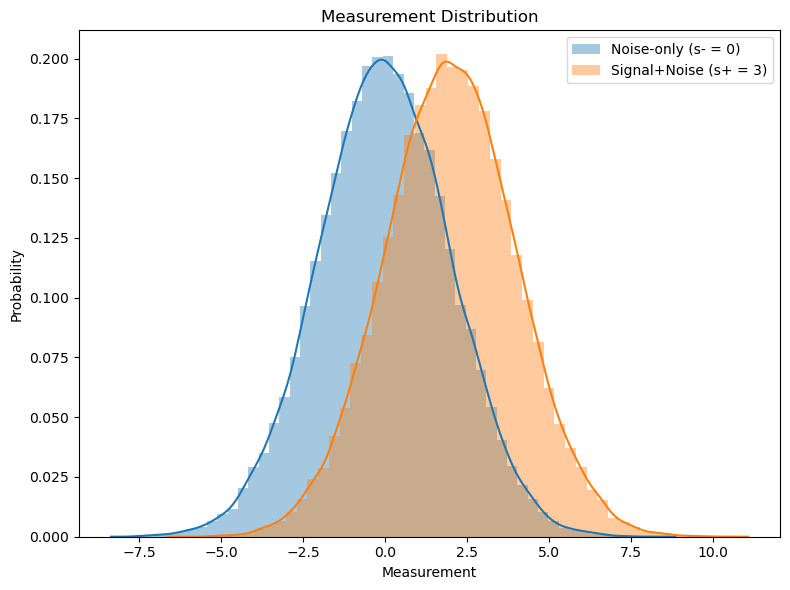

In [22]:
# Plotting the histograms of measurements for noise-only and signal+noise trials
plt.figure(figsize=(8, 6))
sns.distplot(measurement[stimulus == s_negative], bins=50, label='Noise-only (s- = 0)')
sns.distplot(measurement[stimulus == s_positive], bins=50, label='Signal+Noise (s+ = 3)')
plt.title('Measurement Distribution')
plt.xlabel('Measurement')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

### Part d

In [26]:
range(len(measurement))

range(0, 100000)

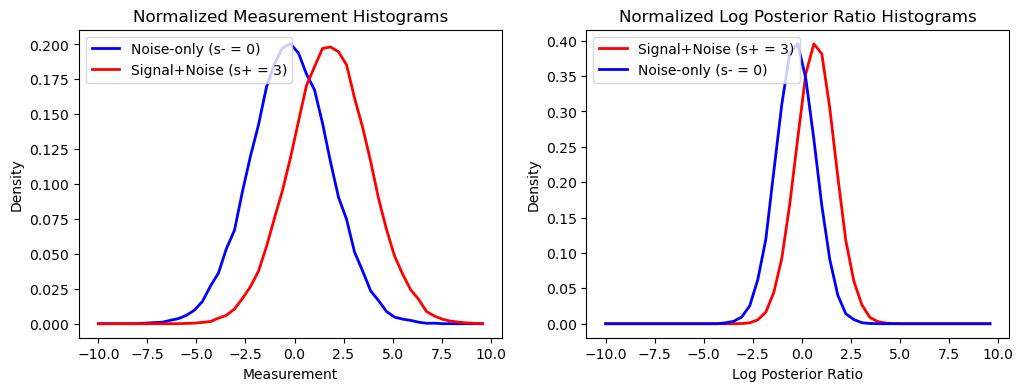

In [28]:
bins = np.linspace(-10, 10, 50)
hist_noise, _ = np.histogram(measurement[stimulus == s_negative], bins=bins, density=True)
hist_signal, _ = np.histogram(measurement[stimulus == s_positive], bins=bins, density=True)

# Plot the normalized histograms as lines
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(bins[:-1], hist_noise, label='Noise-only (s- = 0)', color='blue', linewidth=2)
plt.plot(bins[:-1], hist_signal, label='Signal+Noise (s+ = 3)', color='red', linewidth=2)
plt.title('Normalized Measurement Histograms')
plt.xlabel('Measurement')
plt.ylabel('Density')
plt.legend()
# (d) Calculate the log posterior ratio
# Prior probabilities
p_signal = 0.6
p_noise = 0.4

# Likelihoods under each hypothesis
likelihood_signal = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((measurement - s_positive) / sigma) ** 2)
likelihood_noise = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((measurement - s_negative) / sigma) ** 2)

# Calculate the log posterior ratio
log_posterior_ratio = np.log((likelihood_signal * p_signal) / (likelihood_noise * p_noise))

# Calculate histograms of the log posterior ratio
bins_log_ratio = np.linspace(-10, 10, 50)
hist_log_ratio_signal, _ = np.histogram(log_posterior_ratio[stimulus == s_positive], bins=bins_log_ratio, density=True)
hist_log_ratio_noise, _ = np.histogram(log_posterior_ratio[stimulus == s_negative], bins=bins_log_ratio, density=True)

plt.subplot(1,2,2)
plt.plot(bins_log_ratio[:-1], hist_log_ratio_signal, label='Signal+Noise (s+ = 3)', color='red', linewidth=2)
plt.plot(bins_log_ratio[:-1], hist_log_ratio_noise, label='Noise-only (s- = 0)', color='blue', linewidth=2)
plt.title('Normalized Log Posterior Ratio Histograms')
plt.xlabel('Log Posterior Ratio')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

### Part f

In [31]:
s_positive

2

In [33]:
stimulus

array([0, 2, 2, ..., 2, 0, 2])

In [35]:
s_pos_log = log_posterior_ratio[stimulus == s_positive]
s_neg_log = log_posterior_ratio[stimulus == s_negative]

“high confidence” when the absolute value of the log posterior ratio exceeds 2, “medium
confidence” when it lies between 1 and 2, and “low confidence” when it is lies between 0
and 1.

In [38]:
high_spos_T = s_pos_log[s_pos_log > 2]
high_spos_F = s_neg_log[s_neg_log > 2]
high_sneg_T =  s_neg_log[s_neg_log < -2]
high_sneg_F = s_pos_log[s_pos_log < -2]

#------------------------------------------------

med_spos_T = s_pos_log[(s_pos_log <= 2) & (s_pos_log > 1)]
med_spos_F = s_neg_log[(s_neg_log <= 2) & (s_neg_log > 1)]
med_sneg_T =  s_neg_log[(s_neg_log < -1) & (s_neg_log >= -2)]
med_sneg_F = s_pos_log[(s_pos_log < -1) & (s_pos_log >= -2)]

#-----------------------------------------------

low_spos_T = s_pos_log[(s_pos_log <= 1) & (s_pos_log > 0)]
low_spos_F = s_neg_log[(s_neg_log <= 1) & (s_neg_log > 0)]
low_sneg_T  = s_neg_log[(s_neg_log < 0) & (s_neg_log >= -1)]
low_sneg_F = s_pos_log[(s_pos_log < 0) & (s_pos_log >= -1)]

In [40]:
total_no = len(low_sneg_T) + len(low_spos_F) + len(med_sneg_T) + len(med_spos_F)+ len(high_sneg_T)+ len(high_spos_F)
total_yes = len(low_spos_T) + len(low_sneg_F) + len(med_spos_T) + len(med_sneg_F) + len(high_spos_T) + len(high_sneg_F)

In [42]:
d = {'S -,high Confidence': [len(high_sneg_F)/total_yes,  len(high_sneg_T)/total_no],
    'S -,medium Confidence': [len(med_sneg_F)/total_yes, len(med_sneg_T)/total_no], 
    'S -,Low Confidence': [len(low_sneg_F)/total_yes, len(low_sneg_T)/total_no], 
    'S +,Low Confidence': [len(low_spos_T)/total_yes, len(low_spos_F)/total_no], 
     'S +,medium Confidence': [len(med_spos_T)/total_yes, len(med_spos_F)/total_no], 
     'S +,high Confidence': [len(high_spos_T)/total_yes, len(high_spos_F)/total_no]}

df = pd.DataFrame(data=d, index=["S+", "S-"])

In [44]:
df 

,"S -,high Confidence","S -,medium Confidence","S -,Low Confidence","S +,Low Confidence","S +,medium Confidence","S +,high Confidence"
S+,0.0016,0.027117,0.153817,0.356033,0.326700,0.134733
S-,0.0294,0.153200,0.359575,0.322900,0.117525,0.017400


### Part g

In [47]:
table_ROC = np.cumsum(df.iloc[:], axis = 1)
table_ROC

,"S -,high Confidence","S -,medium Confidence","S -,Low Confidence","S +,Low Confidence","S +,medium Confidence","S +,high Confidence"
S+,0.0016,0.028717,0.182533,0.538567,0.865267,1.0
S-,0.0294,0.182600,0.542175,0.865075,0.982600,1.0


Text(0, 0.5, 'False alarm rate')

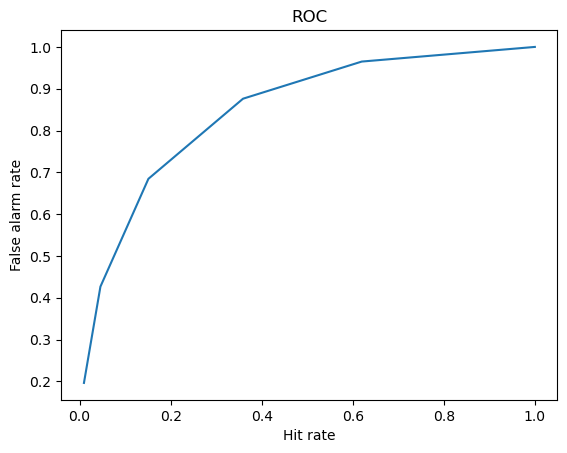

In [173]:
#s = 3
sns.lineplot(x = table_ROC.iloc[0], y = table_ROC.iloc[1])
plt.title("ROC")
plt.xlabel('Hit rate')
plt.ylabel('False alarm rate')

### Part h

Text(0, 0.5, 'False alarm rate')

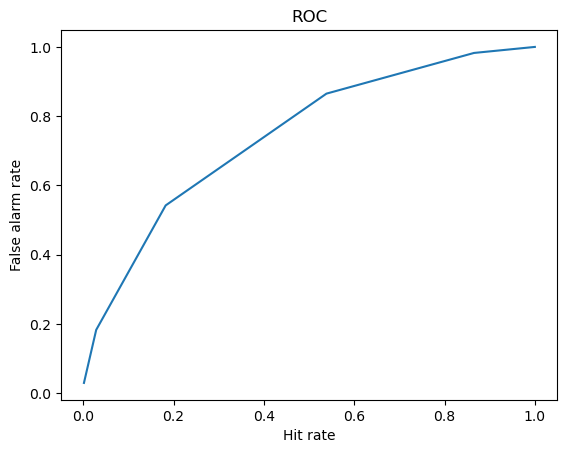

In [49]:
# S = 2
sns.lineplot(x = table_ROC.iloc[0], y = table_ROC.iloc[1])
plt.title("ROC")
plt.xlabel('Hit rate')
plt.ylabel('False alarm rate')


### Part i

The change in ROC with reduced signal strength is interpreted, explaining why the ROC curve moves closer to the diagonal as the signal becomes harder to detect.

## Problem 7.12 

Here, we combine cue combination (Chapter 5) with the discrimination task of the current chapter. A judge in a trial is trying to determine whether a suspect is guilty. The juror’s prior is 0.5. The judge has three conditionally independent pieces of evidence. If they had had only
one of these pieces (any one of them), the posterior probability that the suspect is guilty would have been 60%. Now that they have all three pieces, what is the posterior probability that the suspect is guilty? This problem only uses the conditional independence assumption Eq. (5.1) from Chapter 5,
not the Gaussian noise assumption Eq. (5.3). Please note that the use of Bayes’ rule is not entirely unchallenged in the world of jurisdiction, but we would like you to answer this question as if this problem was already overcome.

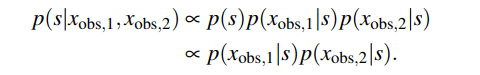

In [61]:
prior = 0.5
posterior = 0.6
likelihood = posterior/prior
posterior_combined = likelihood * likelihood * likelihood * prior
posterior_combined

0.864

## Problem 7.14

This is a mathematical problem extending the formalism of this chapter to measurement noise with unequal (stimulus-dependent) variance. Consider our discrimination task with two possible stimulus values, s+ and s−. Assume equal probabilities (flat prior). In the chapter, we
assumed that the distributions of the measurement, p(x|s = s+) and p(x|s = s−), were normal with
equal variance. Now assume instead that their variances are different and have values σ+2 and σ−2 ,
respectively.

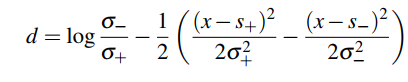

b) Now assume s+ = 3, s− = 0, σ+ = 3, and σ− = 1. Plot the log posterior ratio as a function
of x.

In [117]:
#parameter
s_pos = 3
sigma_pos = 3
s_neg = 0
sigma_neg = 1

#stimulus
stimulus=[]
stimulus.extend(repeat(s_pos,500))
stimulus.extend(repeat(s_neg,500))
random.shuffle(stimulus)
stimulus = np.array(stimulus)
#measurement = stimulu =np.random.normal()

In [125]:
measurement = []
for i in range(len(stimulus)):
    if stimulus[i] == 3:
        measurement.append(stimulus[i] + np.random.normal(0, sigma_pos, 500))
    else:
        measurement.append(stimulus[i] + np.random.normal(0, sigma_neg, 500))
        

In [137]:
measurement

array([ 1.10924488,  3.46575115, -0.8403371 , ...,  5.00164861,
        5.01354833, -4.97453   ])

In [165]:
d = np.log(sigma_neg/sigma_pos) - (1/2 * (((measurement - s_pos)**2 / (2* sigma_pos**2)) - ((measurement - s_neg)**2 / (2* sigma_neg**2))))

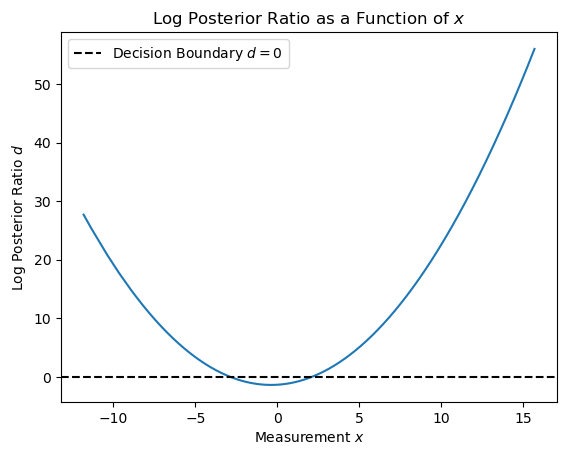

In [175]:
sns.lineplot(y = d, x = measurement)
plt.axhline(0, color='black', linestyle='--', label="Decision Boundary $d=0$")
plt.xlabel('Measurement $x$')
plt.ylabel('Log Posterior Ratio $d$')
plt.title('Log Posterior Ratio as a Function of $x$')
plt.legend()
plt.grid(False)
plt.show()

In Figure 7.3, the variances were equal, leading to a linear function. Here, the unequal variances introduce a non-linearity, with the shape depending on the difference between the variances.

Text(0, 0.5, 'Hit rate')

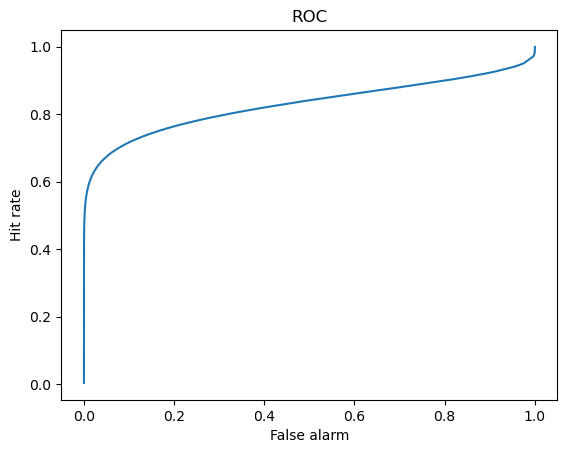

In [251]:

#where d > 0 decision for s_+ is hit rate and for s_neg is false alarm
k = measurement[np.where(d_values > 0)]

# Calculate Hit Rate and False-Alarm Rate
hit_rate = norm.cdf((s_pos - k ) / sigma_pos)
false_alarm_rate = norm.cdf((s_neg - k) / sigma_neg)

#print(f"Hit Rate: {hit_rate}")
#print(f"False-Alarm Rate: {false_alarm_rate}")
sns.lineplot(x = false_alarm_rate , y = hit_rate)
plt.title("ROC")
plt.xlabel("False alarm")
plt.ylabel("Hit rate")